## Preprocess the data

### Load Dataset

In [23]:
# Load train images and labels Functions

import os
import numpy as np
import cv2

IMG_SIZE = 230

def load_data(labels):   
    train_images = []
    train_labels = []

    for label in labels:
        label_folder = dataset_folder + label
        for _image in os.listdir(label_folder):
            _image_path = os.path.join(label_folder, _image)
            img = cv2.imread(_image_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            train_images.append(np.array(img))
            train_labels.append(labels.index(label))
    
    return np.array(train_images, dtype=np.float64), np.array(train_labels)

In [24]:
# Load data

path = 'dataset/'

labels = os.listdir(path)
train_images, train_labels = load_data(labels)
        
print(images.shape)
print(labels)

(20929, 230, 230)
['maggie_simpson', 'charles_montgomery_burns', 'patty_bouvier', 'ralph_wiggum', 'chief_wiggum', 'milhouse_van_houten', 'rainier_wolfcastle', 'cletus_spuckler', 'martin_prince', 'lenny_leonard', 'sideshow_bob', 'fat_tony', 'selma_bouvier', 'barney_gumble', 'jasper_beardly', 'gil', 'moe_szyslak', 'carl_carlson', 'edna_krabappel', 'snake_jailbird', 'groundskeeper_willie', 'sideshow_mel', 'ned_flanders', 'abraham_grampa_simpson', 'krusty_the_clown', 'helen_lovejoy', 'waylon_smithers', 'apu_nahasapeemapetilon', 'marge_simpson', 'comic_book_guy', 'nelson_muntz', 'mayor_quimby', 'kent_brockman', 'jimbo_jones', 'professor_john_frink', 'bumblebee_man', 'principal_skinner', 'bart_simpson', 'lisa_simpson', 'hans_moleman', 'otto_mann', 'troy_mcclure', 'miss_hoover', 'disco_stu', 'homer_simpson', 'agnes_skinner']


In [25]:
# Random Shuffle Train Images and Labels (in unison)

s = numpy.random.permutation(len(train_labels))
numpy.random.shuffle(s)

train_images = train_images[s]
train_labels = train_labels[s]

### Test Loaded Dataset

In [26]:
import matplotlib.pyplot as plt

In [27]:
# Plot Image Function

def plot_img_label(img, label):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    
def plot_img_colorbar(img):
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)


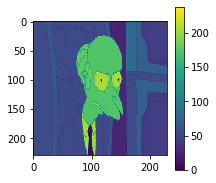

In [32]:
plt.figure(figsize = (3, 3))
plot_img_colorbar(train_images[0])
plt.show()

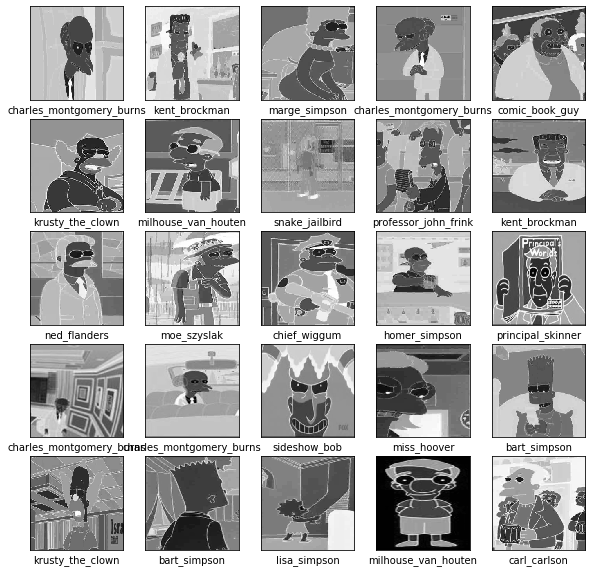

In [49]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plot_img_label(train_images[i], labels[train_labels[i]])
plt.show()

### Load TestSet

In [91]:

def load_testset(path):
    test_images, test_labels = [], []
    
    for _file in os.listdir(path):
        
        # get label
        label = _file.split('.')[0].split('_')[:-1]
        label = '_'.join(label)
        
        # get image
        _image_path = os.path.join(path, _file)
        img = cv2.imread(_image_path, cv2.IMREAD_GRAYSCALE)
        try:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        except:
            print("Error while resizing image")
            continue

        test_images.append(np.array(img))
        test_labels.append(labels.index(label))
        
    return np.array(test_images, dtype=np.float64), np.array(test_labels)

In [93]:

test_images, test_labels = load_testset('testset/')

print(test_images.shape)

(990, 230, 230)


In [95]:
# Test TestData

for _test_label in test_labels:
    if not _test_label in labels:
        print("WARNING - Label not found - {}".format(_test_label))

WARNING - Label not found - 36
WARNING - Label not found - 27
WARNING - Label not found - 23
WARNING - Label not found - 36
WARNING - Label not found - 27
WARNING - Label not found - 10
WARNING - Label not found - 31
WARNING - Label not found - 31
WARNING - Label not found - 10
WARNING - Label not found - 22
WARNING - Label not found - 29
WARNING - Label not found - 32
WARNING - Label not found - 23
WARNING - Label not found - 22
WARNING - Label not found - 44
WARNING - Label not found - 4
WARNING - Label not found - 30
WARNING - Label not found - 30
WARNING - Label not found - 18
WARNING - Label not found - 1
WARNING - Label not found - 18
WARNING - Label not found - 38
WARNING - Label not found - 1
WARNING - Label not found - 4
WARNING - Label not found - 28
WARNING - Label not found - 32
WARNING - Label not found - 28
WARNING - Label not found - 32
WARNING - Label not found - 9
WARNING - Label not found - 9
WARNING - Label not found - 9
WARNING - Label not found - 9
WARNING - Label 

WARNING - Label not found - 18
WARNING - Label not found - 1
WARNING - Label not found - 37
WARNING - Label not found - 38
WARNING - Label not found - 37
WARNING - Label not found - 28
WARNING - Label not found - 32
WARNING - Label not found - 5
WARNING - Label not found - 9
WARNING - Label not found - 5
WARNING - Label not found - 5
WARNING - Label not found - 5
WARNING - Label not found - 9
WARNING - Label not found - 5
WARNING - Label not found - 5
WARNING - Label not found - 32
WARNING - Label not found - 28
WARNING - Label not found - 37
WARNING - Label not found - 1
WARNING - Label not found - 38
WARNING - Label not found - 37
WARNING - Label not found - 37
WARNING - Label not found - 18
WARNING - Label not found - 44
WARNING - Label not found - 44
WARNING - Label not found - 38
WARNING - Label not found - 4
WARNING - Label not found - 30
WARNING - Label not found - 16
WARNING - Label not found - 22
WARNING - Label not found - 16
WARNING - Label not found - 24
WARNING - Label not

## Build the model

In [51]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow import keras

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE, IMG_SIZE)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(labels), activation='softmax')
])

In [55]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [56]:
model.fit(train_images, train_labels, epochs=10)

Train on 20929 samples
Epoch 1/10
20929/20929 [==============================] - 49s 2ms/sample - loss: 427.6381 - accuracy: 0.0580
Epoch 2/10
20929/20929 [==============================] - 41s 2ms/sample - loss: 3.4540 - accuracy: 0.1073
Epoch 3/10
20929/20929 [==============================] - 37s 2ms/sample - loss: 3.2912 - accuracy: 0.1073
Epoch 4/10
20929/20929 [==============================] - 36s 2ms/sample - loss: 3.2045 - accuracy: 0.1073
Epoch 5/10
20929/20929 [==============================] - 38s 2ms/sample - loss: 3.1609 - accuracy: 0.1073
Epoch 6/10
20929/20929 [==============================] - 40s 2ms/sample - loss: 3.1385 - accuracy: 0.1073
Epoch 7/10
20929/20929 [==============================] - 35s 2ms/sample - loss: 3.1264 - accuracy: 0.1073
Epoch 8/10
20929/20929 [==============================] - 40s 2ms/sample - loss: 3.1192 - accuracy: 0.1073
Epoch 9/10
20929/20929 [==============================] - 41s 2ms/sample - loss: 3.1148 - accuracy: 0.1073
Epoch 10/10
